In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

### Data pilot 1

In [2]:
#file = r"C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_1\Rearrange_datasets\all_Madrid.xlsx"
file = r"/home/sara/Documents/APlanet/Pilot_1/Rearrange_datasets/all_Madrid.xlsx"


xl1= pd.ExcelFile(file)      # Load spreadsheet
df1 = xl1.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df1.index  = np.arange(len(df1))

#rename column in df1
df1.rename(columns={'Alternative 1':"What is the best alternative for you?"}, inplace=True)
df1.rename(columns={'How much do you personally trust the following institutions from 1 to 7, where 1 means ‘No trust at all’ and 7 means ‘Trust compltely’? Parlament: ':"Parlament:"}, inplace=True)
df1.rename(columns={'How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:': "Air pollution derived by cars is one of the major causes of premature death in Europe:"}, inplace=True)


### Data pilot 2

In [3]:
#file2 = r"C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_2\Rearrange_datasets\all_Madrid.xlsx"
file2 = r"/home/sara/Documents/APlanet/Pilot_2/Rearrange_datasets/all_Madrid.xlsx"

xl2= pd.ExcelFile(file2)      # Load spreadsheet
df2 = xl2.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df2.index  = np.arange(len(df2))

df2.rename(columns={'How much do you personally trust the following institutions from 1 to 7, where 1 means ‘No trust at all’ and 7 means ‘Trust compltely’? Parlament: ':"Parlament:"}, inplace=True)
df2.rename(columns={'How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:': "Air pollution derived by cars is one of the major causes of premature death in Europe:"}, inplace=True)

df2["How many people does your household have including you?"] = pd.to_numeric(df2["How many people does your household have including you?"].replace('-', np.nan), errors='coerce')
df2["Which year were you born?"] = pd.to_numeric(df2["Which year were you born?"].replace('-', np.nan), errors='coerce')
df2["How many children under the age of 15 live with you?"] = pd.to_numeric(df2["How many children under the age of 15 live with you?"].replace('-', np.nan), errors='coerce')

## List of questions and their categories

In [46]:
questions = {
    'Do you have a driver license?': ['Yes', 'No'],
    "Do you own or have access to a car?" : ["I own","I do not own, but have access to","I do not have access to"],
    "What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most." : ["Gasoline","Diesel","Hybrid or plug-in hybrid","Electric"],
    #"Are you planning to buy a car in the next year?":["Yes, gasoline","Yes, diesel","Yes, hybrid or plug-in hybrid","Yes, electric","No"],
    "Do you own or have access to a bike (electric or regular)?" : ["I own","I do not own, but have access to","I do not have access to"],
    "Do you own or have access to a motorbyke?": ["I own","I do not own, but have access to","I do not have access to"],
    "Do you own or have access to a e-scooter?": ["I own","I do not own, but have access to","I do not have access to"],
    "What is your employment status?": ["Full-time worker","Part-time worker","Student","Retired","Unemployed","Not working for other reasons"],
    "What is the purpose/destination of this trip?": ["Workplace","Education place","Trip within my job/for job purposes","Bring/pick up children or adult","Errands or shopping","Visit family or friend","Leisure activity (cultural, sport, etc)","Other"],
    "At what time of the day do you typically travel?" : ["morning","afternoon","evening","night"],
    "By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time." : ["Private car (driver)","Private car (passenger)","Bus","Metro, tram or light rail","Train","Walk","Bike (regular or electric)","E-scooter","Motorcycle","Other"],
    "How are the traffic conditions normally on the trip?" : ["Heavily congested","Somewhat congested","Little or no congested"],
    "What is the approximate travel time of this trip (one way)?" : ["10-19 minutes","20-39 minutes","40-59 minutes","1-2 hours","more than 2 hours"],
    "What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip." : ["less than 1 EUR","1-2.5 EUR","2.5-4.99 EUR","5-9.99 EUR","10-19.99 EUR","20 EUR or more"],
    #"Do you pay road tolls on your trip?" : ["Yes","No"],
    "If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?": ["Private car (driver)","Private car (passenger)","Bus","Metro, tram or light rail","Train","Walk","Bike (regular or electric)","E-scooter","Motorcycle","Other", "I have no available alternatives"],
    "How would you rate your alternative?" : ["Almost as good as my current choice","Somewhat worse than my current choice","Much worse than my current choice","I do not know"],
    "What type of society do you think is Spain today – which diagram comes the closest?": ['A', 'B', 'C', 'D', 'E', 'I do not know'],
    "What do you think Spain ought to be like – which would you prefer?" : ['A', 'B', 'C', 'D', 'E', 'I do not know'],
    'How fair do you think the wealth distribution is in your country?':['Very fair', 'Fair', 'Unfair','Very unfair','I do not know'], 
    #"How many euros would you spend on this trip?": ["0.20 EUR", "1.50 EUR","2 EUR","3 EUR"],
    "What is the best alternative for you?": ["General budget","Equal cash transfer","Cash transfer for low-income citizens","Investments in roads","Investments in public transport, walking and cycling"],
    "How do you identify as?": ['woman', 'man', 'other', 'prefer not to say'],
    #"Which year were you born?" : np.arange(1920, 2005, 1),
    "What is your highest level of education?": ["elementary school","high school","university (less than 4 years)","university (more than 4 years)"],
    "What is your income per year?": ["less than 10k EUR","10k-20k EUR","20k-30k EUR","30k-40k EUR","more than 40k EUR","prefer not to say"], 
    "How many children under the age of 15 live with you?": np.arange(0, 5, 1),
    "Which political party you voted for in the last election?": ["PSOE","Partido Popular","Vox","Unidas Podemos","ERC-Cat","Ciudadanos","JxCat","PNV","EHB","MP-EQUO","BNG","Compromís","Other party","I prefer not to answer"],
    
}


In [64]:
questions1 = {
    "How many people does your household have including you?": np.arange(1, 9, 1),    
    "Parlament:": [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "Municipal council:": [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "County council:": [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "Government:": [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "National politicians:": [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "Political parties:": [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "Air pollution derived by cars is one of the major causes of premature death in Europe:" : [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"].tolist(),
    "The introduction of policies such as road pricing will alleviate congestion problems:" : [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "Revenues collected through taxes are used to create a well-functioning welfare state and society:" : [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    "Tax revenues should be used to help those who are more in need:" : [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"],
    #"I think the overall tax level is too high:" : [1,2,3,4,5,6,7,"I prefer not to answer","I do not know"]
}


AttributeError: 'list' object has no attribute 'tolist'

In [67]:
#[1,2,3,4,5,6,7,"I prefer not to answer","I do not know"] to list
type([1,2,3,4,5,6,7,"I prefer not to answer","I do not know"])

list

### Functions for plotting

In [48]:
# Function to calculate percentage of responses
def calculate_percentage(df, question, categories):
    df[question] = pd.Categorical(df[question], categories=categories, ordered=True)
    return df[question].value_counts(normalize=True).reindex(categories) * 100

# Adjust title to go to a new line if it exceeds the length of the plot at the end of a word
def wrap_title(title, max_length=60):
    if len(title) > max_length:
        words = title.split()
        wrapped_title = ''
        line_length = 0
        for word in words:
            if line_length + len(word) + 1 > max_length:
                wrapped_title += '\n'
                line_length = 0
            wrapped_title += word + ' '
            line_length += len(word) + 1
        return wrapped_title.strip()
    return title


# Adjust the size of xticks to avoid overlap
def wrap_labels(labels, max_words=3):
    wrapped_labels = []
    for label in labels:
        if isinstance(label, int):
            label = str(label)
        words = label.split()
        if len(words) > max_words:
            wrapped_label = '\n'.join([' '.join(words[i:i+max_words]) for i in range(0, len(words), max_words)])
            wrapped_labels.append(wrapped_label)
        else:
            wrapped_labels.append(label)
    return wrapped_labels

## Bar plots

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


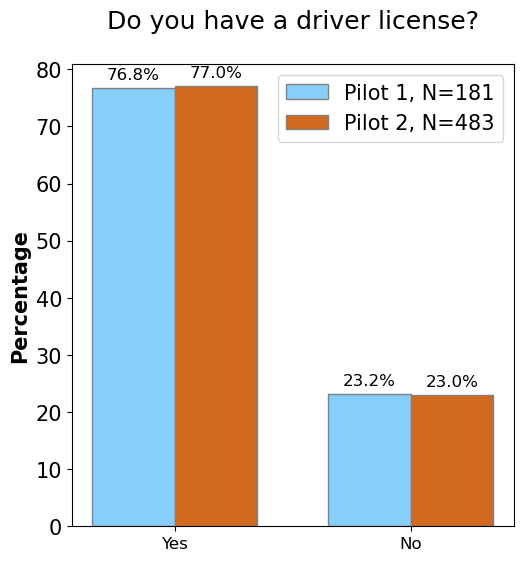

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


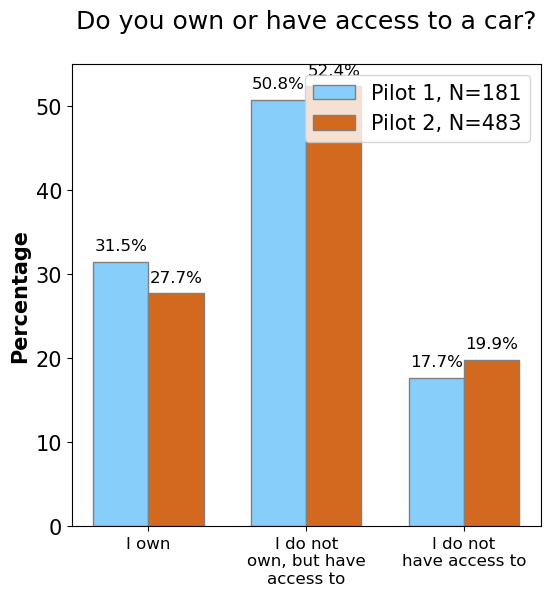

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


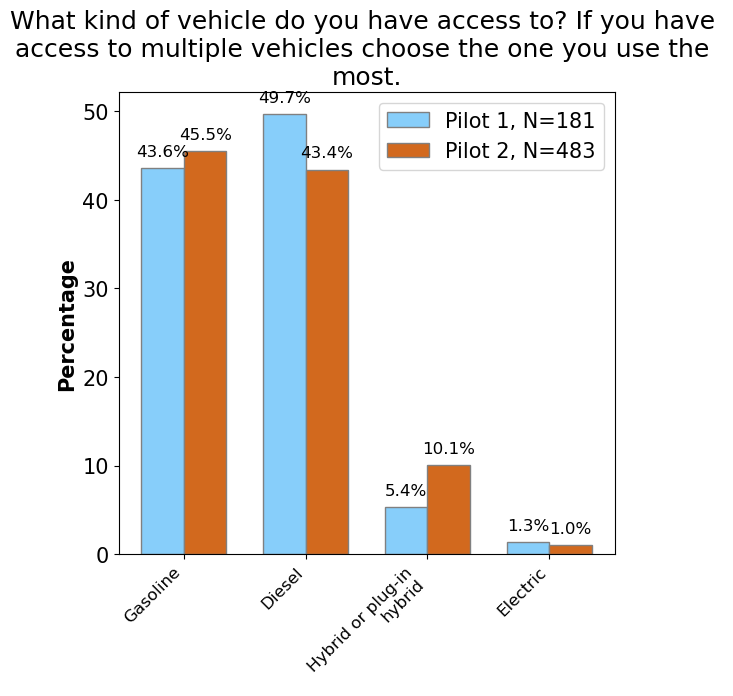

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


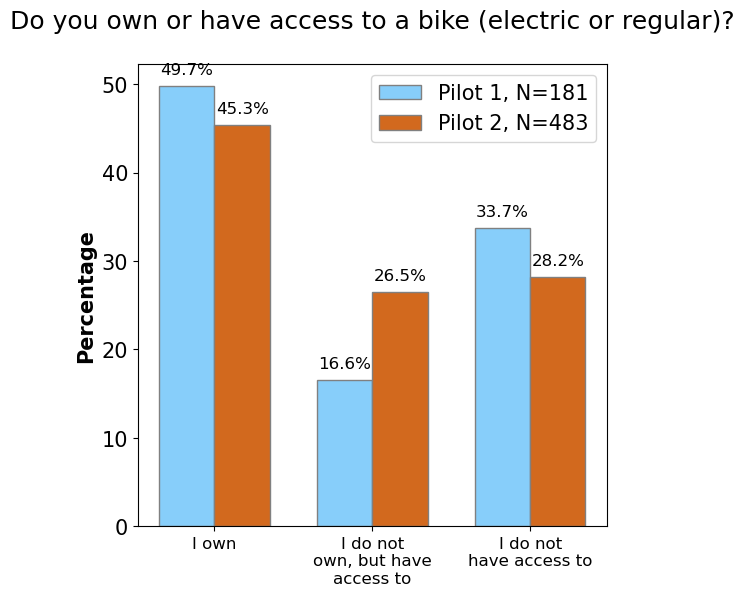

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


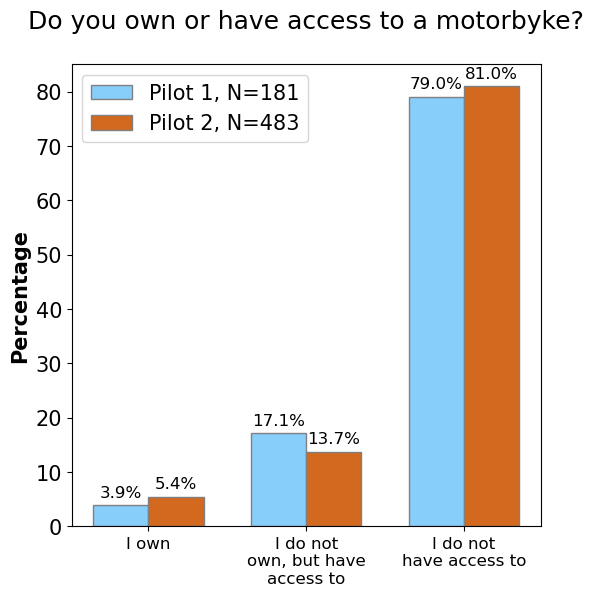

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


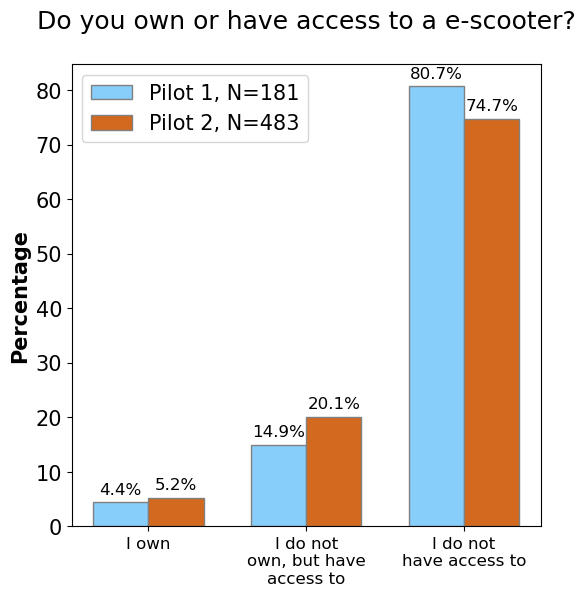

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


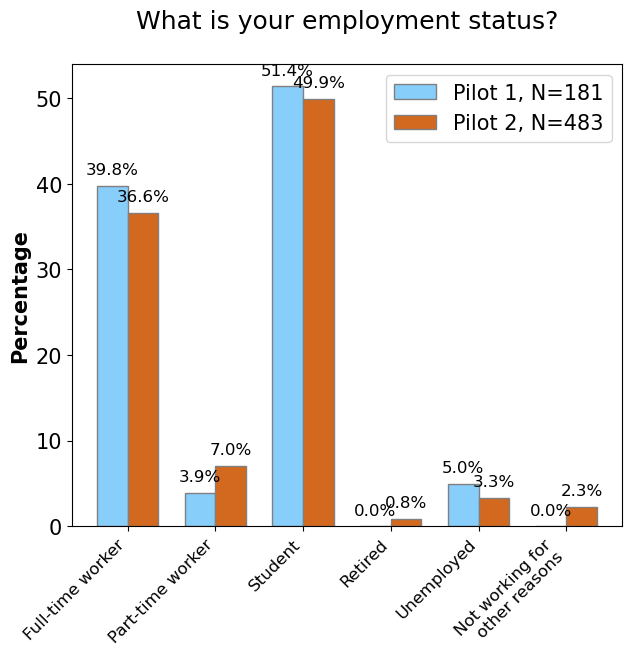

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


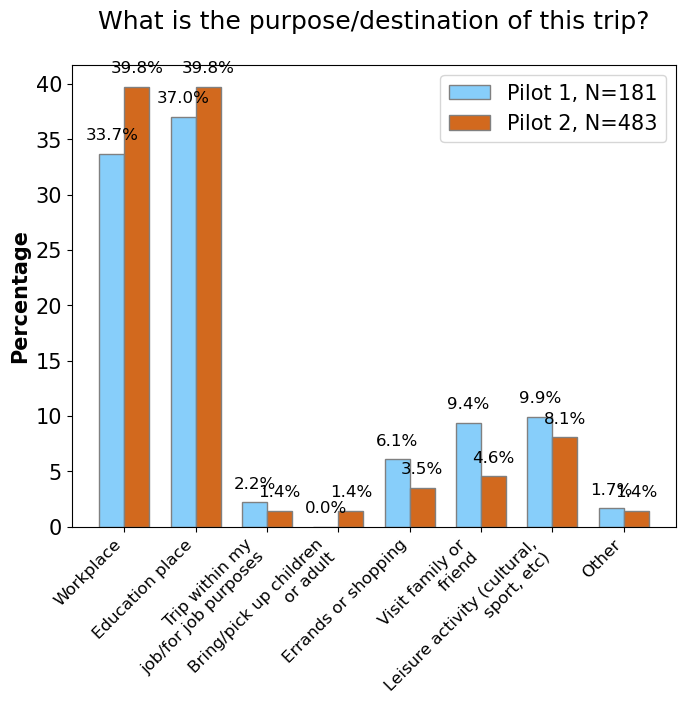

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


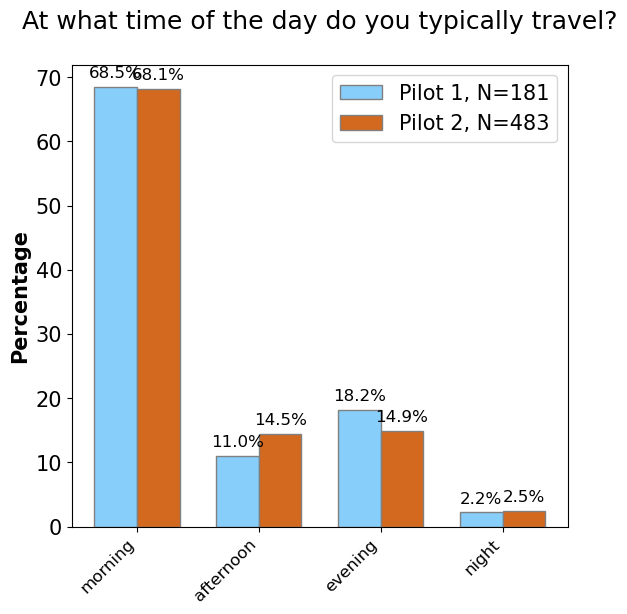

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


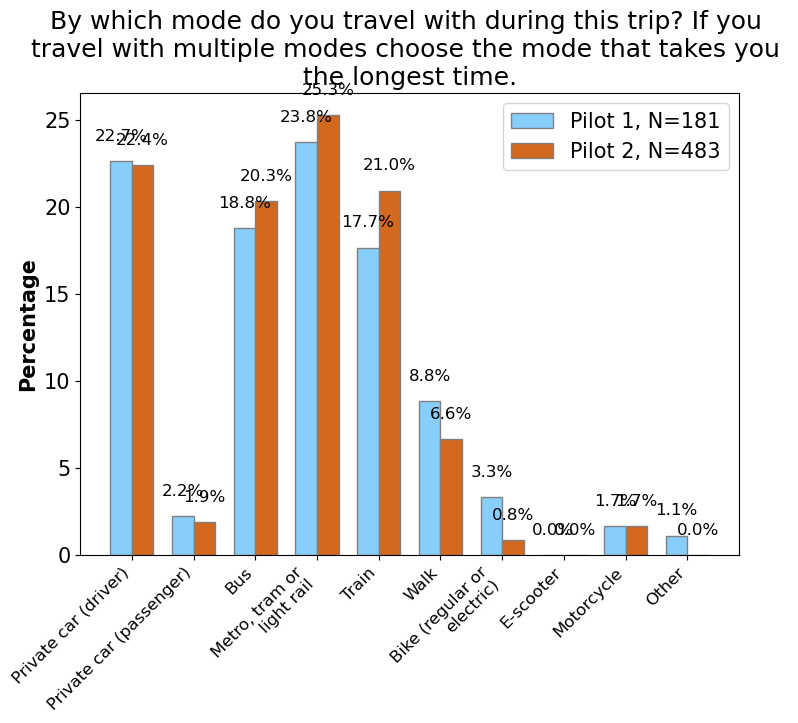

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


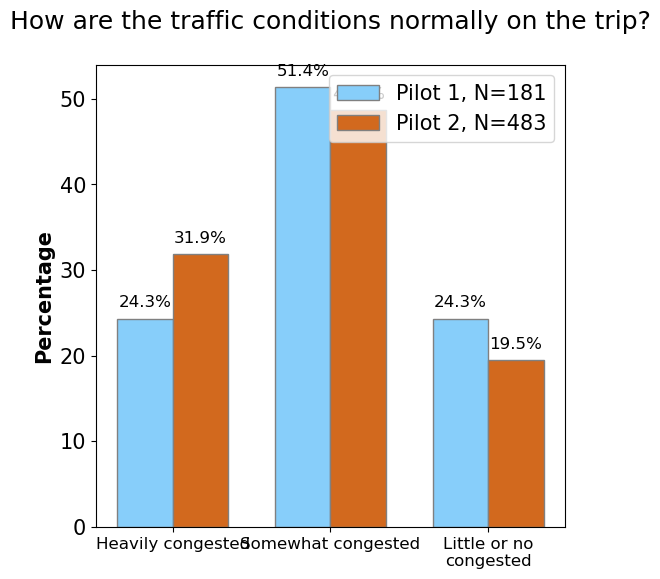

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


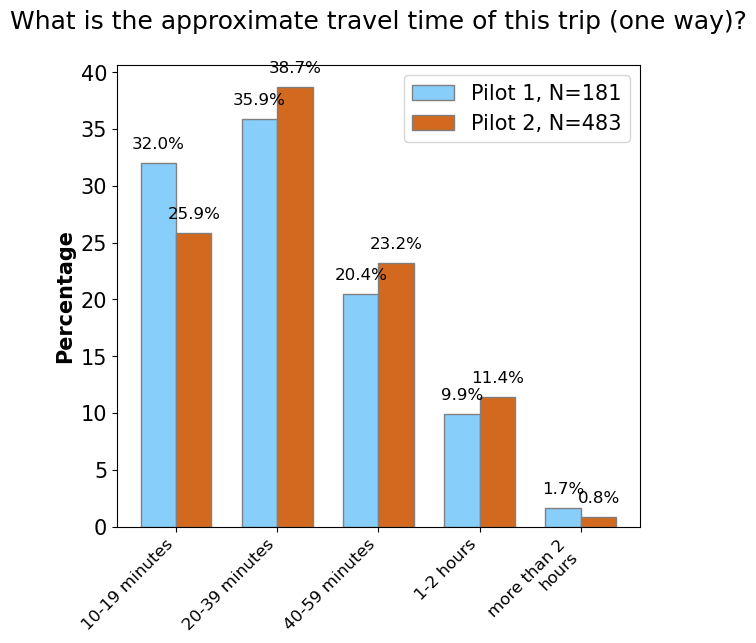

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


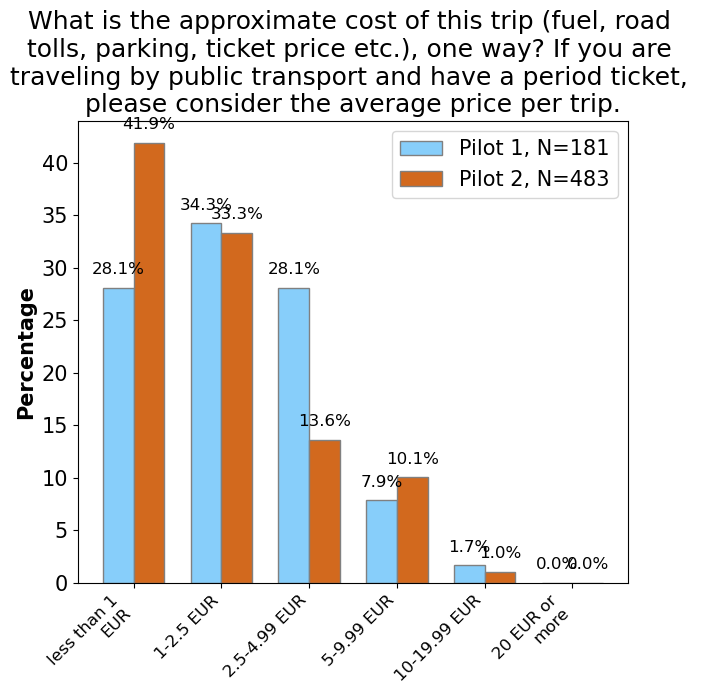

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


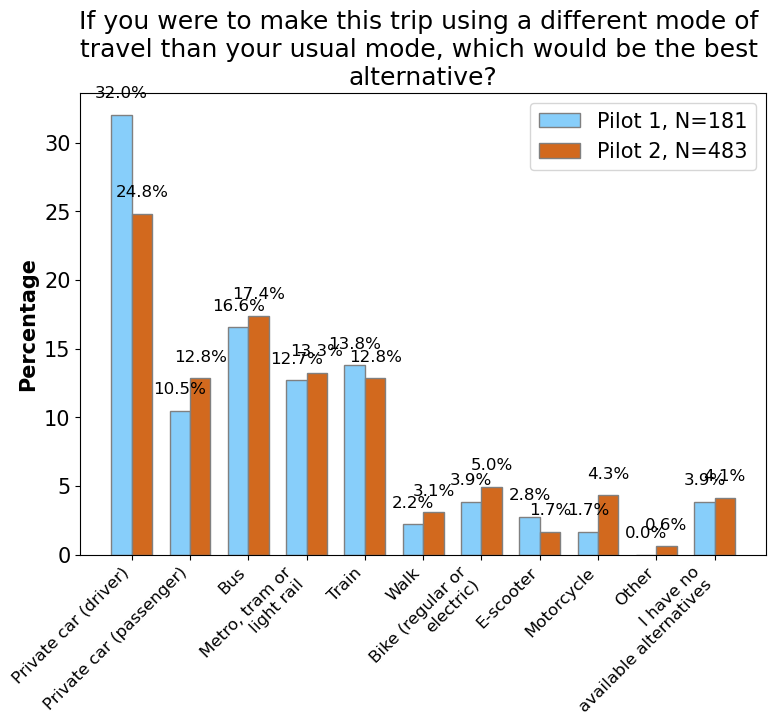

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


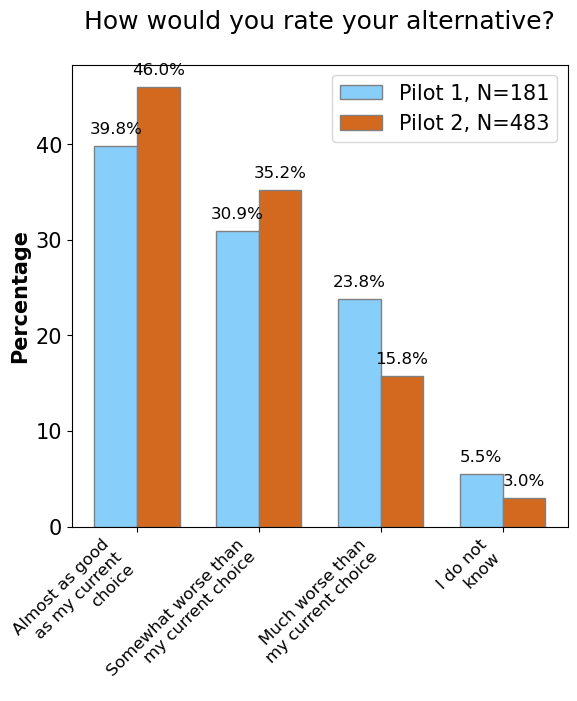

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


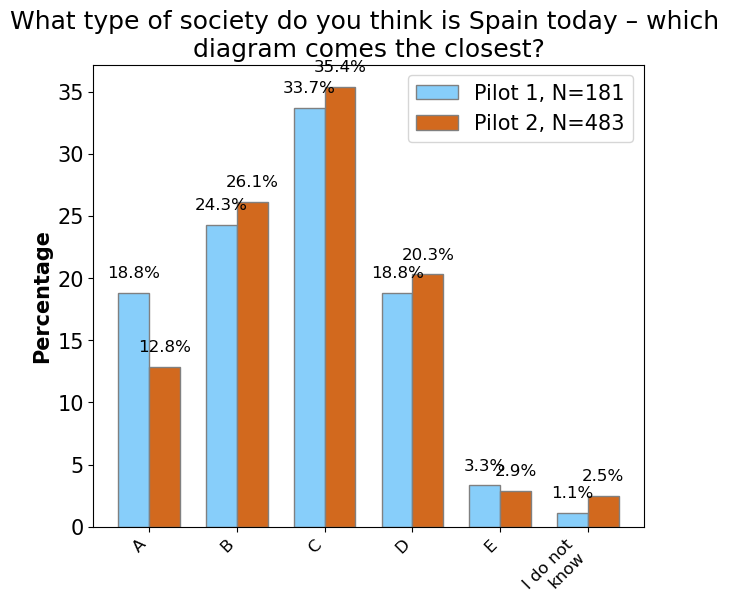

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


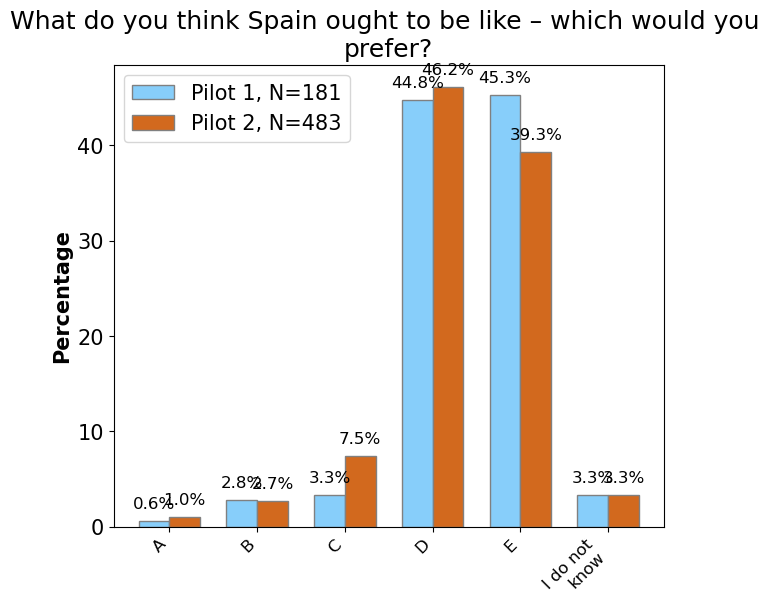

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


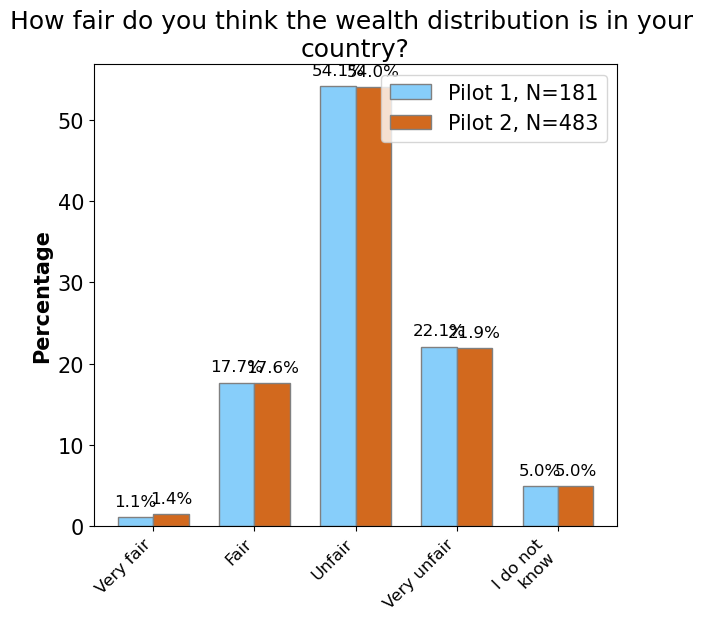

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


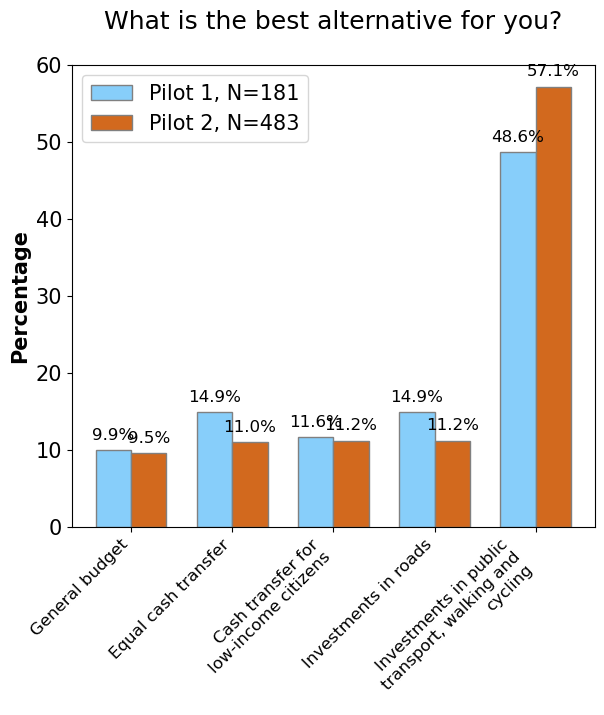

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


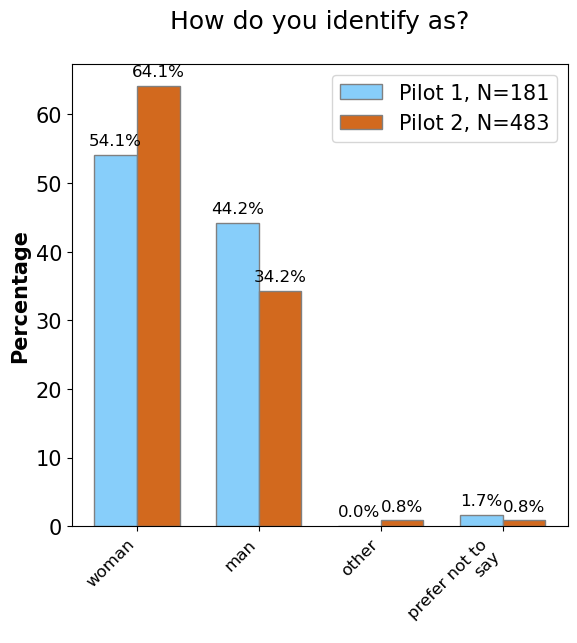

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


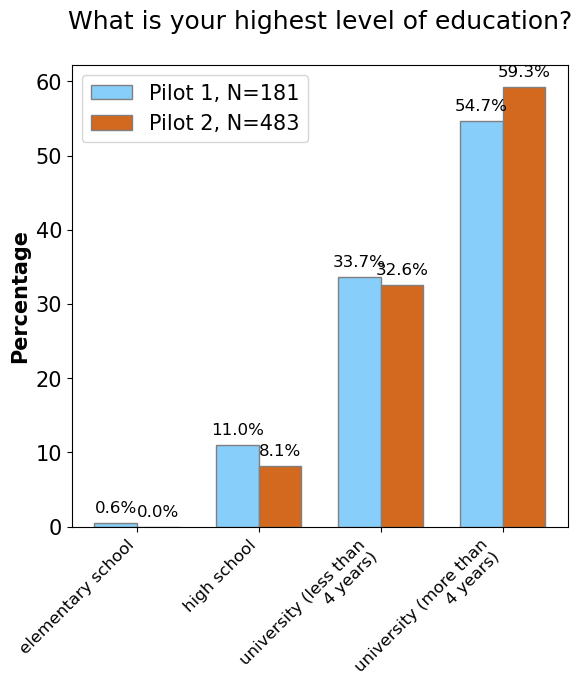

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


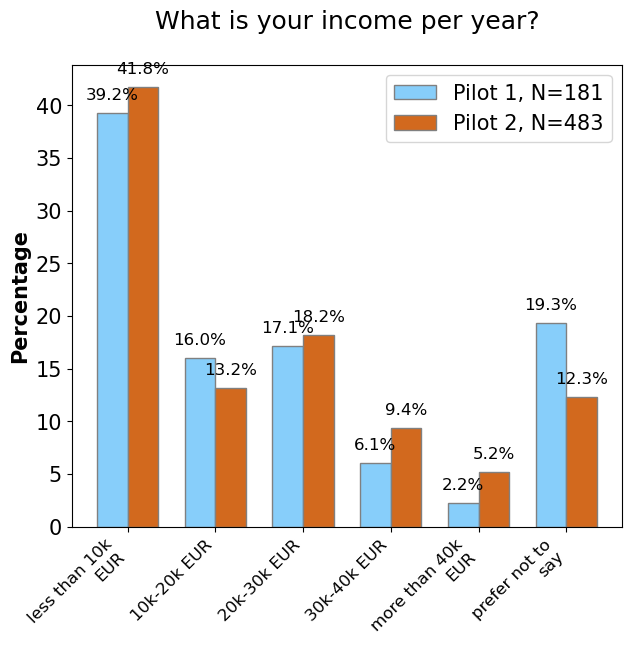

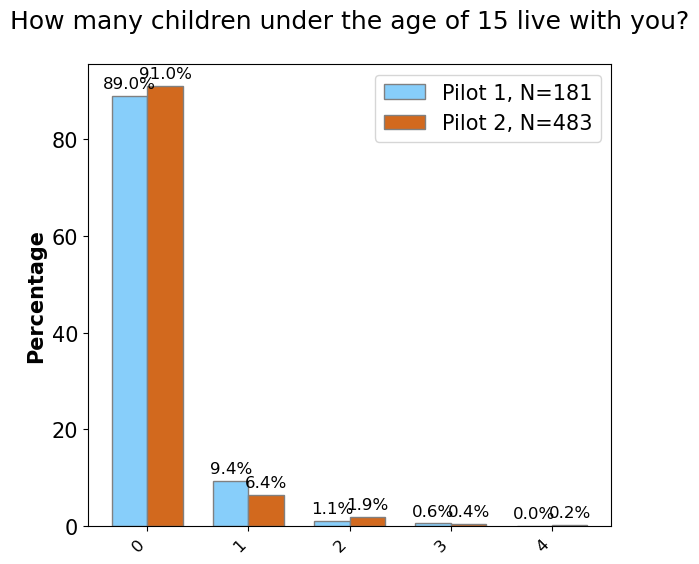

/tmp/ipykernel_10038/2018484418.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
/tmp/ipykernel_10038/2018484418.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)


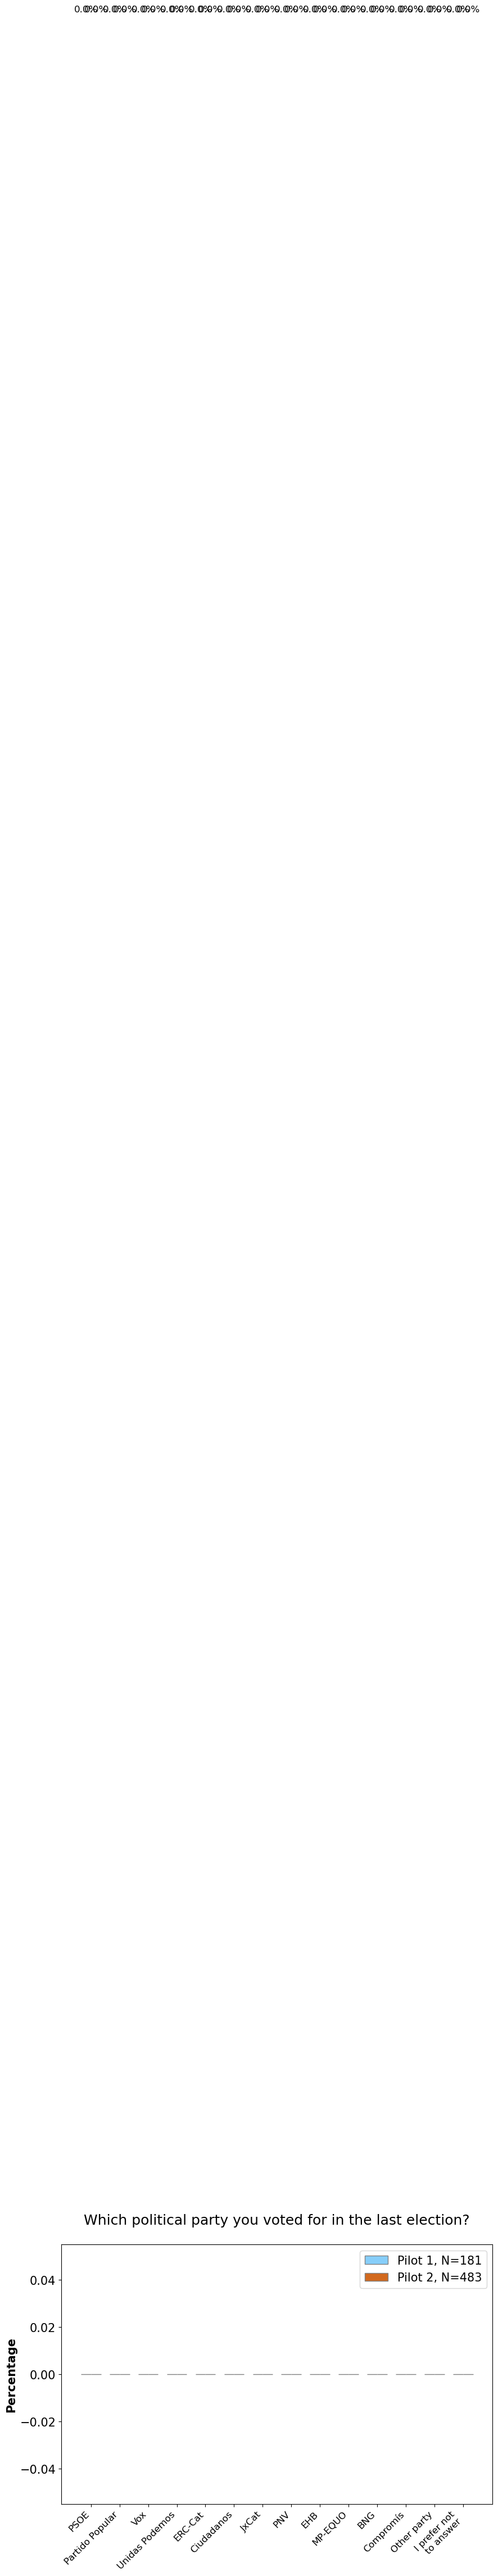

In [52]:
for question, categories in questions.items():
    # Calculate percentage of responses for each dataframe
    df1_percentage = calculate_percentage(df1, question, categories)
    df2_percentage = calculate_percentage(df2, question, categories)
    
    # Combine the percentages into a single DataFrame
    combined_df = pd.DataFrame({'Pilot 1': df1_percentage, 'Pilot 2': df2_percentage}).fillna(0)
    
    # Set the width of the bars
    bar_width = 0.35
   
    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(combined_df.index))
    r2 = [x + bar_width for x in r1]
    
    # Create the bar plot
    # Adjust the size of the plot according to the number of xticks
    plt.figure(figsize=(10, 6))
    plt.bar(r1, combined_df['Pilot 1'], color='lightskyblue', width=bar_width, edgecolor='grey', label='Pilot 1, N=' + str(len(df1)))
    plt.bar(r2, combined_df['Pilot 2'], color='chocolate', width=bar_width, edgecolor='grey', label='Pilot 2, N=' + str(len(df2)))
    
    # Add labels
    plt.ylabel('Percentage', fontweight='bold', fontsize=15)
    plt.xticks([r + bar_width/2 for r in range(len(combined_df.index))], combined_df.index, fontsize=15)
    plt.yticks(fontsize=15)
    
    # Add legend
    plt.legend(fontsize=15) 

    # Add percentage labels on top of the bars
    for i in range(len(r1)):
        plt.text(r1[i], combined_df['Pilot 1'][i] + 1, f'{combined_df["Pilot 1"][i]:.1f}%', ha='center', va='bottom', fontsize=12)
        plt.text(r2[i], combined_df['Pilot 2'][i] + 1, f'{combined_df["Pilot 2"][i]:.1f}%', ha='center', va='bottom', fontsize=12)

    wrapped_labels = wrap_labels(combined_df.index)
    plt.xticks([r + bar_width/2 for r in range(len(combined_df.index))], wrapped_labels, fontsize=12)

    # Adjust the size of xticks to avoid overlap
    if len(combined_df.index) > 3:
        plt.xticks(rotation=45, ha='right')
        plt.gcf().set_size_inches(len(combined_df.index) * 0.5 + 5, 6)

    plt.gcf().set_size_inches(len(combined_df.index) * bar_width + 5, 6)
    #plt.xticks(rotation=0)

    #plt.ylim(0, 100)
    # Replace slashes with underscores in the filename
   
    plt.title(wrap_title(question + '\n'), fontsize=18)

    filename = question.replace('/', '_')
    #plt.savefig(f"/home/sara/Documents/APlanet/Joint_plots/Figures/{filename}.pdf", bbox_inches='tight')
    plt.show()

In [63]:
combined_df['Pilot 1']
#access last element of the list  
lo=[1,2,3,4,5,6,7,"I prefer not to answer","I do not know"]
lo[-1]

'I do not know'

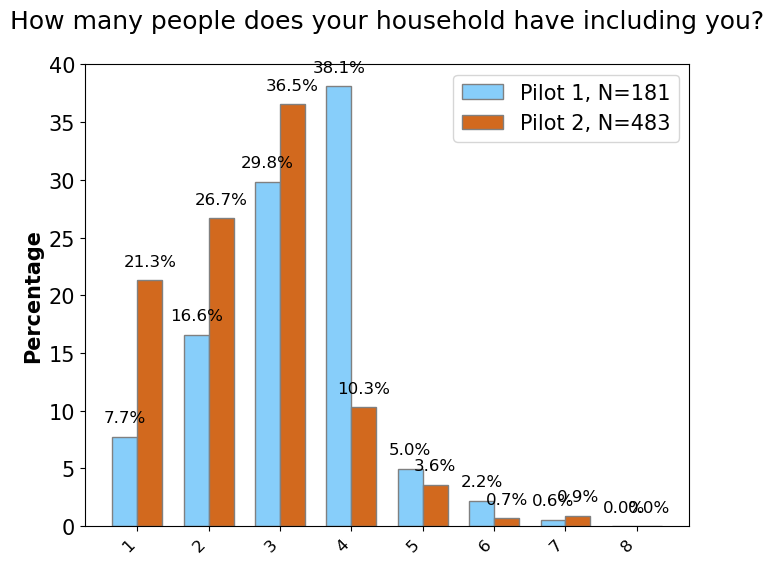

KeyError: 8

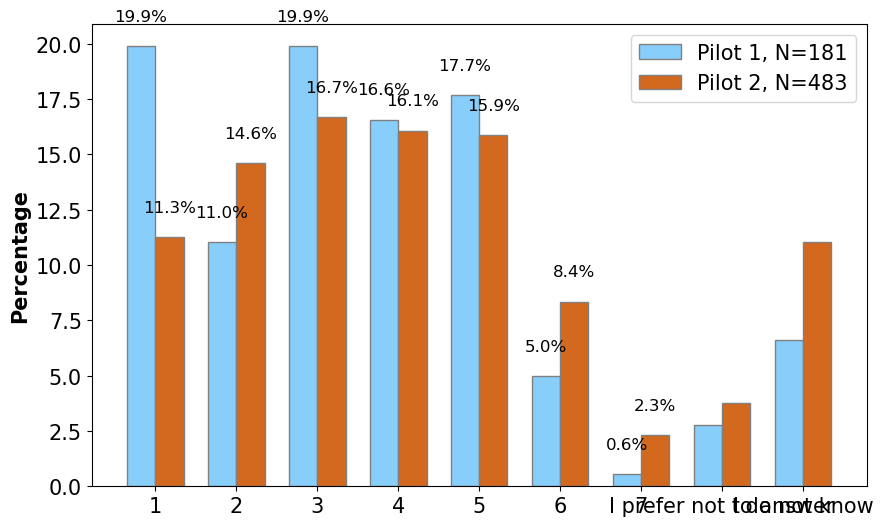

In [59]:
for question, categories in questions1.items():
    # Calculate percentage of responses for each dataframe
    df1_percentage = calculate_percentage(df1, question, categories)
    df2_percentage = calculate_percentage(df2, question, categories)
    
    # Combine the percentages into a single DataFrame
    combined_df = pd.DataFrame({'Pilot 1': df1_percentage, 'Pilot 2': df2_percentage}).fillna(0)
    
    # Set the width of the bars
    bar_width = 0.35
   
    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(combined_df.index))
    r2 = [x + bar_width for x in r1]
    
    # Create the bar plot
    # Adjust the size of the plot according to the number of xticks
    plt.figure(figsize=(10, 6))
    plt.bar(r1, combined_df['Pilot 1'], color='lightskyblue', width=bar_width, edgecolor='grey', label='Pilot 1, N=' + str(len(df1)))
    plt.bar(r2, combined_df['Pilot 2'], color='chocolate', width=bar_width, edgecolor='grey', label='Pilot 2, N=' + str(len(df2)))
    
    # Add labels
    plt.ylabel('Percentage', fontweight='bold', fontsize=15)
    plt.xticks([r + bar_width/2 for r in range(len(combined_df.index))], combined_df.index, fontsize=15)
    plt.yticks(fontsize=15)
    
    # Add legend
    plt.legend(fontsize=15) 
    # Add percentage labels on top of the bars
    for i in range(len(r1)):
        plt.text(r1[i], combined_df['Pilot 1'].loc[i+1] + 1, f'{combined_df["Pilot 1"].loc[i+1]:.1f}%', ha='center', va='bottom', fontsize=12)
        plt.text(r2[i], combined_df['Pilot 2'].loc[i+1] + 1, f'{combined_df["Pilot 2"].loc[i+1]:.1f}%', ha='center', va='bottom', fontsize=12)

    wrapped_labels = wrap_labels(combined_df.index)
    plt.xticks([r + bar_width/2 for r in range(len(combined_df.index))], wrapped_labels, fontsize=12)

    # Adjust the size of xticks to avoid overlap
    if len(combined_df.index) > 3:
        plt.xticks(rotation=45, ha='right')
        plt.gcf().set_size_inches(len(combined_df.index) * 0.5 + 5, 6)

    plt.gcf().set_size_inches(len(combined_df.index) * bar_width + 5, 6)
    #plt.xticks(rotation=0)

    #plt.ylim(0, 100)
    # Replace slashes with underscores in the filename
   
    plt.title(wrap_title(question + '\n'), fontsize=18)

    filename = question.replace('/', '_')
    #plt.savefig(f"/home/sara/Documents/APlanet/Joint_plots/Figures/{filename}.pdf", bbox_inches='tight')
    plt.show()

### Alternative for car drivers

In [7]:
question = "How would you rate your alternative?" 
category = ["Almost as good as my current choice","Somewhat worse than my current choice","Much worse than my current choice","I do not know"]

In [8]:
#subset df1 to take only the rows where the answer to question "By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time." is "Private car (driver)", "Private car (passenger)" or "Motorcycle"
df1_subset = df1[df1["By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time."].isin(["Private car (driver)","Private car (passenger)","Motorcycle"])]
df2_subset = df2[df2["By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time."].isin(["Private car (driver)","Private car (passenger)","Motorcycle"])]

#subset for the complementary answers
df1_subset_complementary = df1[~df1["By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time."].isin(["Private car (driver)","Private car (passenger)","Motorcycle"])]
df2_subset_complementary = df2[~df2["By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time."].isin(["Private car (driver)","Private car (passenger)","Motorcycle"])]

/tmp/ipykernel_10038/2798481521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[question] = pd.Categorical(df[question], categories=categories, ordered=True)
/tmp/ipykernel_10038/2798481521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[question] = pd.Categorical(df[question], categories=categories, ordered=True)
/tmp/ipykernel_10038/2798481521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

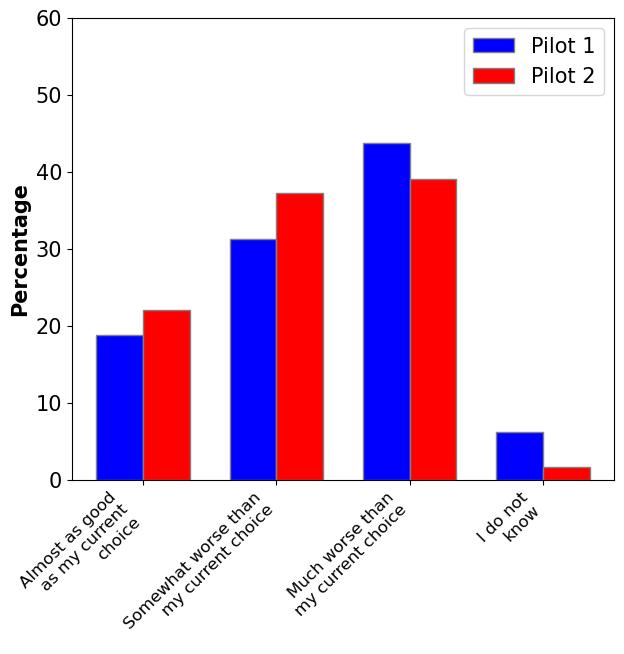

NameError: name 'filename_opposite' is not defined

In [9]:
# Calculate percentage of responses for each dataframe
df1_percentage = calculate_percentage(df1_subset, question, category)
df2_percentage = calculate_percentage(df2_subset, question, category)
df1_opposite_percentage = calculate_percentage(df1_subset_complementary, question, category)
df2_opposite_percentage = calculate_percentage(df2_subset_complementary, question, category)

# Combine the percentages into DataFrames
combined_df = pd.DataFrame({'Pilot 1': df1_percentage, 'Pilot 2': df2_percentage}).fillna(0)
combined_opposite_df = pd.DataFrame({'Pilot 1': df1_opposite_percentage, 'Pilot 2': df2_opposite_percentage}).fillna(0)

# Set the positions of the bars on the x-axis
r1 = np.arange(len(combined_df.index))
r2 = [x + bar_width for x in r1]
r1_opposite = np.arange(len(combined_opposite_df.index))
r2_opposite = [x + bar_width for x in r1_opposite]

# Function to create bar plot
def create_bar_plot(df, r1, r2, title, filename):
    plt.figure(figsize=(10, 6))
    plt.bar(r1, df['Pilot 1'], color='blue', width=bar_width, edgecolor='grey', label='Pilot 1')
    plt.bar(r2, df['Pilot 2'], color='red', width=bar_width, edgecolor='grey', label='Pilot 2')
    plt.ylabel('Percentage', fontweight='bold', fontsize=15)
    plt.xticks([r + bar_width/2 for r in range(len(df.index))], wrap_labels(df.index), fontsize=12)
    plt.yticks(fontsize=15)
    plt.ylim(0, 60)
    plt.legend(fontsize=15)
    #plt.title(title, fontsize=18)
    if len(df.index) > 3:
        plt.xticks(rotation=45, ha='right')
        plt.gcf().set_size_inches(len(df.index) * 0.5 + 5, 6)
    #plt.savefig(f"/home/sara/Documents/APlanet/Joint_plots/Figures/{title}.pdf", bbox_inches='tight')
    plt.show()

# Create bar plots
create_bar_plot(combined_df, r1, r2, question + '\n (For private transport users)', filename)
create_bar_plot(combined_opposite_df, r1_opposite, r2_opposite, question + '\n (For public transport users)', filename_opposite)


### Age of respondents

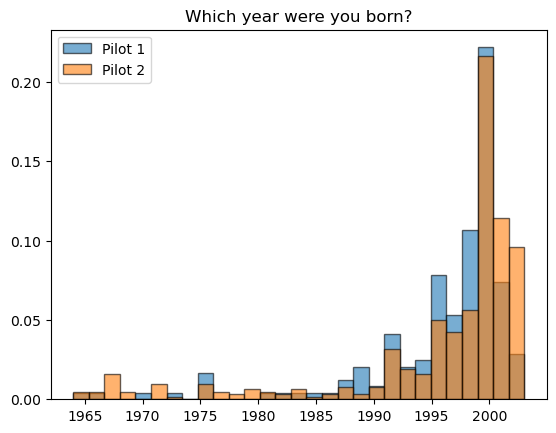

In [22]:
column = "Which year were you born?"

# Define the bin edges
bin_edges = np.linspace(df1[column].min(), df1[column].max(), 30)

# Plot histogram for df1
n, x_a, _ = plt.hist(df1[column], bins=bin_edges, density=True, alpha=0.6, label='Pilot 1', edgecolor='black')

# Plot histogram for df2
n2, x_a2, _ = plt.hist(df2[column], bins=bin_edges, density=True, alpha=0.6, label='Pilot 2', edgecolor='black')

plt.title(column)
plt.legend()
plt.savefig(f"/home/sara/Documents/APlanet/Joint_plots/Figures/{column}.pdf", bbox_inches='tight')
plt.show()

In [23]:
# Calculate age for each respondent
current_year = 2023
df1['Age'] = current_year - df1['Which year were you born?']
df2['Age'] = current_year - df2['Which year were you born?']

# Compute average age for the two pilots
average_age_pilot1 = df1['Age'].mean()
average_age_pilot2 = df2['Age'].mean()

print(f"Average age for Pilot 1: {average_age_pilot1:.2f}")
print(f"Average age for Pilot 2: {average_age_pilot2:.2f}")

Average age for Pilot 1: 27.12
Average age for Pilot 2: 27.59


### Agreement with statements

In [ ]:
df1=df1.rename(columns={'Air pollution derived by cars is one of the major causes of premature death in Europe:': "Air pollution", "The introduction of policies such as road pricing will alleviate congestion problems:":"Road pricing", "Revenues collected through taxes are used to create a well-functioning welfare state and society:":"Revenues", 'Tax revenues should be used to help those who are more in need:':'Tax','I think the overall tax level is too high:':'Tax lev'})
df2=df2.rename(columns={'Air pollution derived by cars is one of the major causes of premature death in Europe:': "Air pollution", "The introduction of policies such as road pricing will alleviate congestion problems:":"Road pricing", "Revenues collected through taxes are used to create a well-functioning welfare state and society:":"Revenues", 'Tax revenues should be used to help those who are more in need:':'Tax','I think the overall tax level is too high:':'Tax lev'})

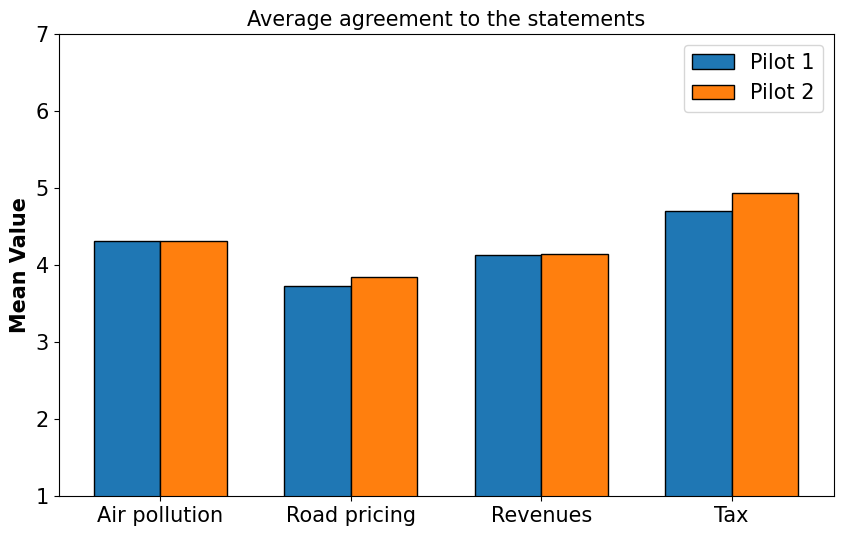

In [ ]:
columns = ['Air pollution', 'Road pricing', 'Revenues', 'Tax']

# Convert columns to numeric for both dataframes
df1[columns] = df1[columns].apply(pd.to_numeric, errors='coerce', axis=1)
df2[columns] = df2[columns].apply(pd.to_numeric, errors='coerce', axis=1)

# Calculate the mean for both dataframes
df1_mean = df1[columns].mean()
df2_mean = df2[columns].mean()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(df1_mean))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, df1_mean, width=bar_width, edgecolor='k', label='Pilot 1')
plt.bar(r2, df2_mean, width=bar_width, edgecolor='k', label='Pilot 2')

# Add labels
plt.ylabel('Mean Value', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(df1_mean))], df1_mean.index, fontsize=15)
plt.yticks(fontsize=15)

# Add legend
plt.legend(fontsize=15)

plt.ylim(1, 7)
plt.xticks(rotation=0)
plt.xlabel('')
plt.title('Average agreement to the statements', fontsize=15)
#plt.tight_layout(pad=2, w_pad=8, h_pad=2)
plt.savefig(f"/home/sara/Documents/APlanet/Joint_plots/Figures/Average_agreement.pdf", bbox_inches='tight')
plt.show()

### Society perception and wish

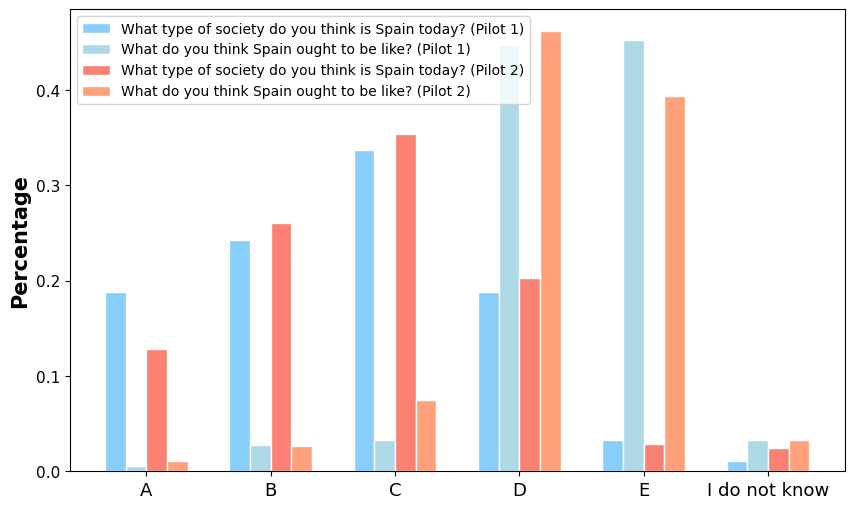

In [ ]:
lst = ['A', 'B', 'C', 'D', 'E', 'I do not know']

fig = plt.figure(figsize=(10, 6))
barWidth = 0.25
# Calculate the percentages for df1
bars1_df1 = df1['What type of society do you think is Spain today – which diagram comes the closest?'].value_counts(normalize=True).loc[lst].tolist()
bars2_df1 = df1['What do you think Spain ought to be like – which would you prefer?'].value_counts(normalize=True).loc[lst].tolist()

# Calculate the percentages for df2
bars1_df2 = df2['What type of society do you think is Spain today – which diagram comes the closest?'].value_counts(normalize=True).loc[lst].tolist()
bars2_df2 = df2['What do you think Spain ought to be like – which would you prefer?'].value_counts(normalize=True).loc[lst].tolist()

# Add labels
plt.ylabel('Percentage', fontweight='bold', fontsize=15)

# Adjust the positions of the bars on the x-axis to add space between groups
r1 = np.arange(len(bars1_df1)) * 1.5
r2 = [x + barWidth for x in r1]
r3 = [x + 2 * barWidth for x in r1]
r4 = [x + 3 * barWidth for x in r1]

# Create the bar plot with adjusted positions
plt.bar(r1, bars1_df1, width=barWidth, edgecolor='white', label='What type of society do you think is Spain today? (Pilot 1)', color= '#87CEFA') #color light blue
plt.bar(r2, bars2_df1, width=barWidth, edgecolor='white', label='What do you think Spain ought to be like? (Pilot 1)', color= '#ADD8E6') #color light blue
plt.bar(r3, bars1_df2, width=barWidth, edgecolor='white', label='What type of society do you think is Spain today? (Pilot 2)', color= '#FA8072') #color light salmon
plt.bar(r4, bars2_df2, width=barWidth, edgecolor='white', label='What do you think Spain ought to be like? (Pilot 2)', color= '#FFA07A') #color salmon
plt.xticks([1.5*r + 1.5 * barWidth for r in range(len(bars1_df1))], lst, fontsize=13)
plt.yticks(fontsize=11)
plt.legend()
plt.savefig(f"/home/sara/Documents/APlanet/Joint_plots/Figures/Spain_society.pdf", bbox_inches='tight')
# Show plot
plt.show()